In [1]:
import pandas as pd
# warning remove
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report,roc_curve, auc, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.preprocessing import StandardScaler,LabelEncoder
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.utils import to_categorical
from keras import callbacks

In [2]:
df = pd.read_csv("../dataset/Assignment.csv")

In [3]:
df.head()

Year  Month  DAY   TEM   DPT   WIS    HUM     SLP  TRAN  ARAN  RAN
0  1964      1   31  19.6  13.3   4.4  71.52  1014.6     3  0.10  NRT
1  1964      2   29  22.3  14.5   4.7  71.03  1013.0     3  0.10  NRT
2  1964      3   31  26.5  21.4   6.1  78.06  1010.9     0  0.00  NRT
3  1964      4   30  27.4  22.5  10.5  80.70  1007.7   198  6.60  LTR
4  1964      5   31  28.3  24.0   6.2  79.97  1004.6   195  6.29  LTR

In [3]:
df_selected = df[["TEM","DPT","WIS","HUM","SLP","RAN"]]

In [5]:
df_selected.head()

TEM   DPT   WIS    HUM     SLP  RAN
0  19.6  13.3   4.4  71.52  1014.6  NRT
1  22.3  14.5   4.7  71.03  1013.0  NRT
2  26.5  21.4   6.1  78.06  1010.9  NRT
3  27.4  22.5  10.5  80.70  1007.7  LTR
4  28.3  24.0   6.2  79.97  1004.6  LTR

#### Variable's information for the selected Dataset:


Variable name | Variable Description | Level of Measurement | Appropriate Measures
---:|:---:|:---:|---
**TEM**    | Temperature       |  Interval Level   | Mean
**DPT**	 |  Dew Point Temperature|Interval Level | Mean
**WIS**	| Wind Speed|Ratio Level | Mean
**HUM**	 |Humidity|Interval Level | Mean
**SLP**	| Sea Level Pressure | Interval Level | Mean
**RAN**	 |Rainfall CATEGORY | Nominal Level | Mode

In [6]:
df_selected.shape

(624, 6)

In [7]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TEM     624 non-null    float64
 1   DPT     624 non-null    float64
 2   WIS     624 non-null    float64
 3   HUM     624 non-null    float64
 4   SLP     624 non-null    float64
 5   RAN     624 non-null    object 
dtypes: float64(5), object(1)
memory usage: 29.4+ KB


In [8]:
df_selected.isnull().sum()

TEM    0
DPT    0
WIS    0
HUM    0
SLP    0
RAN    0
dtype: int64

In [9]:
# Statistical summary
df_selected.describe()

TEM         DPT         WIS         HUM         SLP
count  624.000000  624.000000  624.000000  624.000000   624.00000
mean    25.730288   20.874038    6.557083   79.205833  1008.41875
std      3.107279    4.308750    2.591438    5.918284     4.77739
min     18.100000    9.100000    0.000000   62.140000   981.70000
25%     23.375000   16.800000    4.600000   75.182500  1004.27500
50%     27.300000   23.000000    6.100000   79.595000  1008.95000
75%     28.100000   24.500000    8.300000   84.375000  1012.60000
max     29.900000   26.000000   13.800000   91.810000  1016.70000

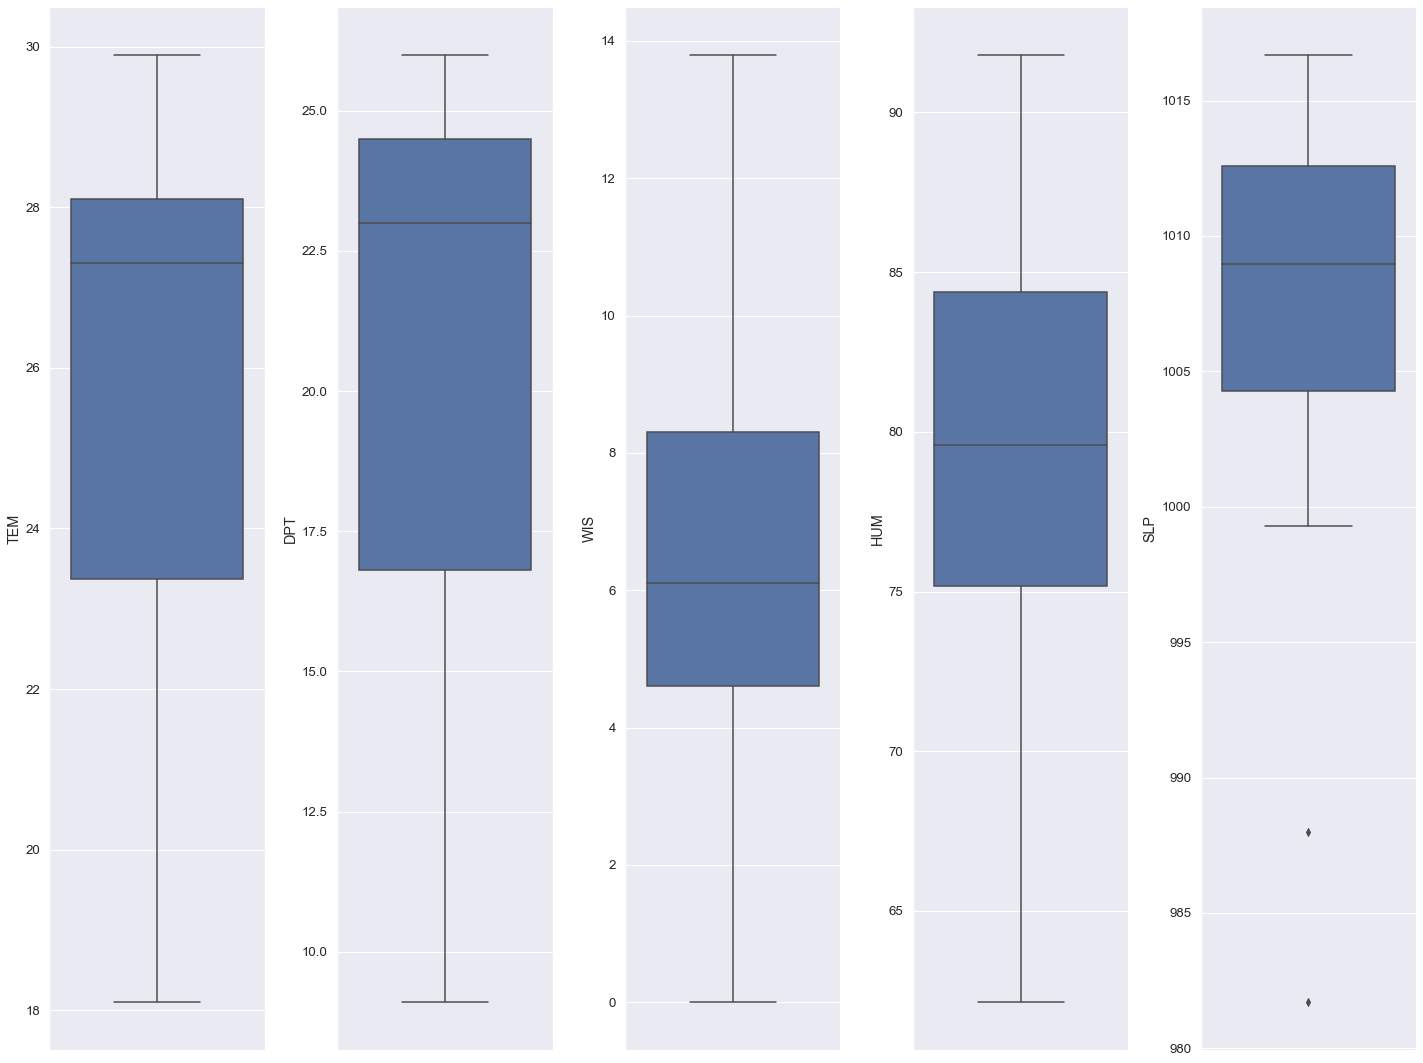

In [10]:
cols = df[["TEM","DPT","WIS","HUM","SLP"]]
sns.set(rc={'figure.figsize':(12,12)}, font_scale=1.2)

# initialize figure with 5 subplots in a row
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(20, 15))
index = 0
axs = axs.flatten() # type: ignore
for i in list(cols.columns):
     sns.boxplot(y=i, data=cols, ax=axs[index])
     index += 1

plt.tight_layout()
plt.show()

In [11]:
q1 = df_selected['SLP'].quantile(0.25)
q3 = df_selected['SLP'].quantile(0.75)
iqr = q3 - q1
low = q1 - 1.5 * iqr
high = q3 + 1.5 * iqr
print('Quartile 1 =', q1)
print('Quartile 3 =', q3)
print('Inter Quartile Range =', iqr)
print('Low =', low)
print('High =', high)

Quartile 1 = 1004.275
Quartile 3 = 1012.6
Inter Quartile Range = 8.325000000000045
Low = 991.7874999999999
High = 1025.0875


In [12]:
df_selected[df_selected['SLP'] > high] 

Empty DataFrame
Columns: [TEM, DPT, WIS, HUM, SLP, RAN]
Index: []

In [13]:
df_selected[df_selected['SLP'] < low] 

TEM   DPT  WIS    HUM    SLP  RAN
28  29.6  25.3  7.4  80.39  988.0  LTR
36  20.8  15.5  3.9  78.03  981.7  NRT

In [14]:
#Trimming
df_selected = df_selected[df_selected['SLP'] > low]
df_selected.shape

(622, 6)

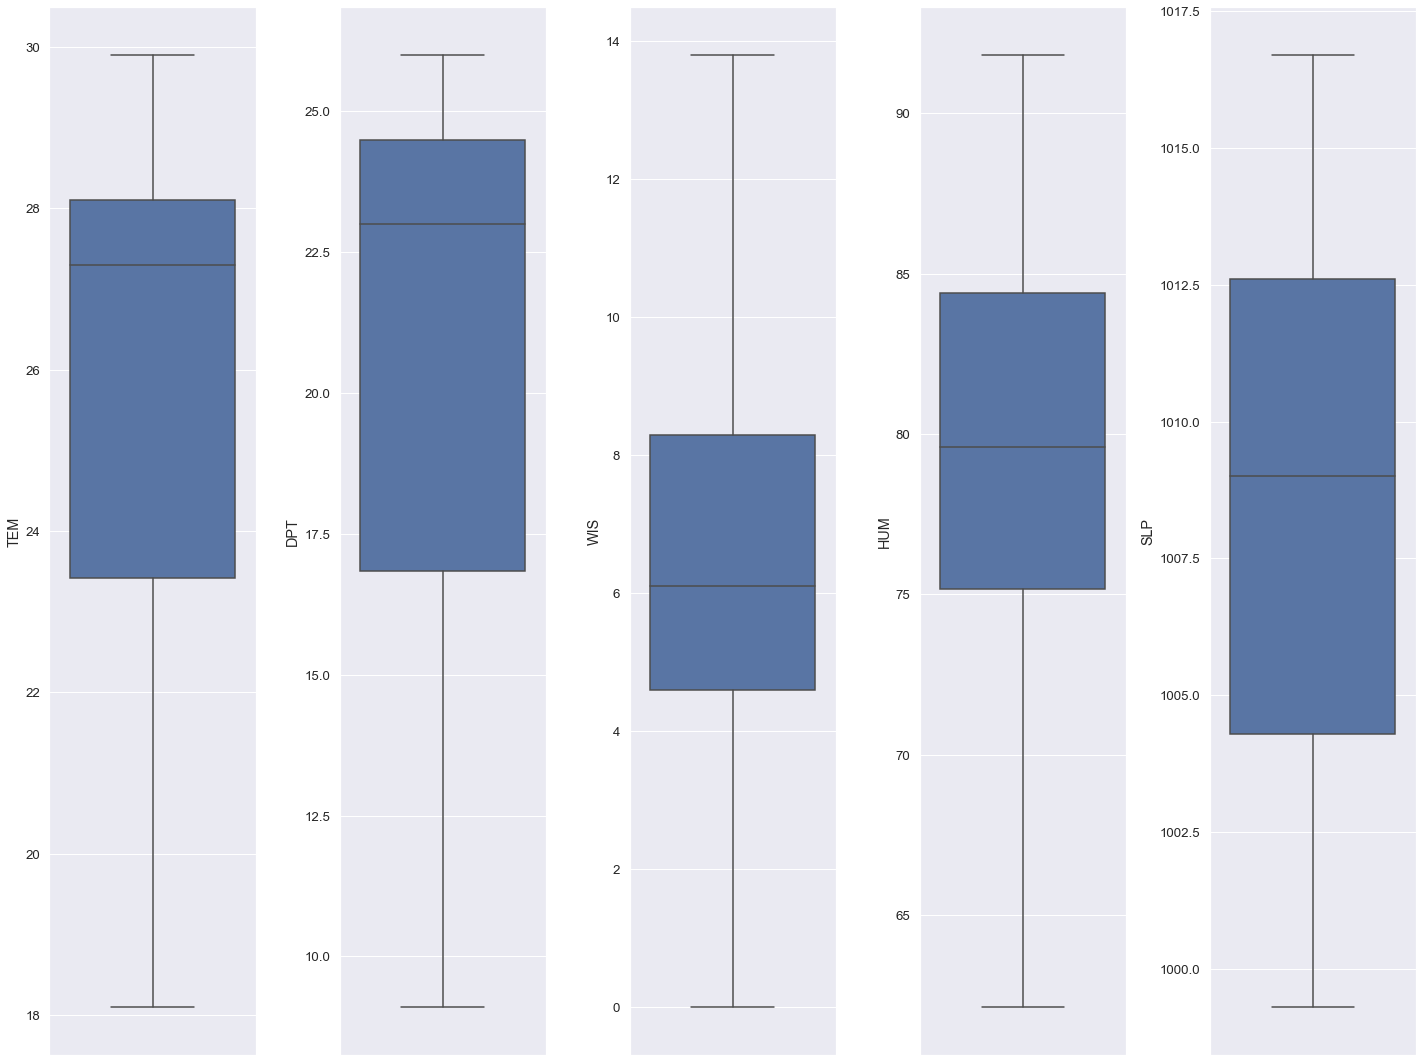

In [15]:
cols = df_selected[["TEM","DPT","WIS","HUM","SLP"]]
sns.set(rc={'figure.figsize':(12,12)}, font_scale=1.2)

# initialize figure with 5 subplots in a row
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(20, 15))
index = 0
axs = axs.flatten() # type: ignore
for i in list(cols.columns):
     sns.boxplot(y=i, data=cols, ax=axs[index])
     index += 1

plt.tight_layout()
plt.show()

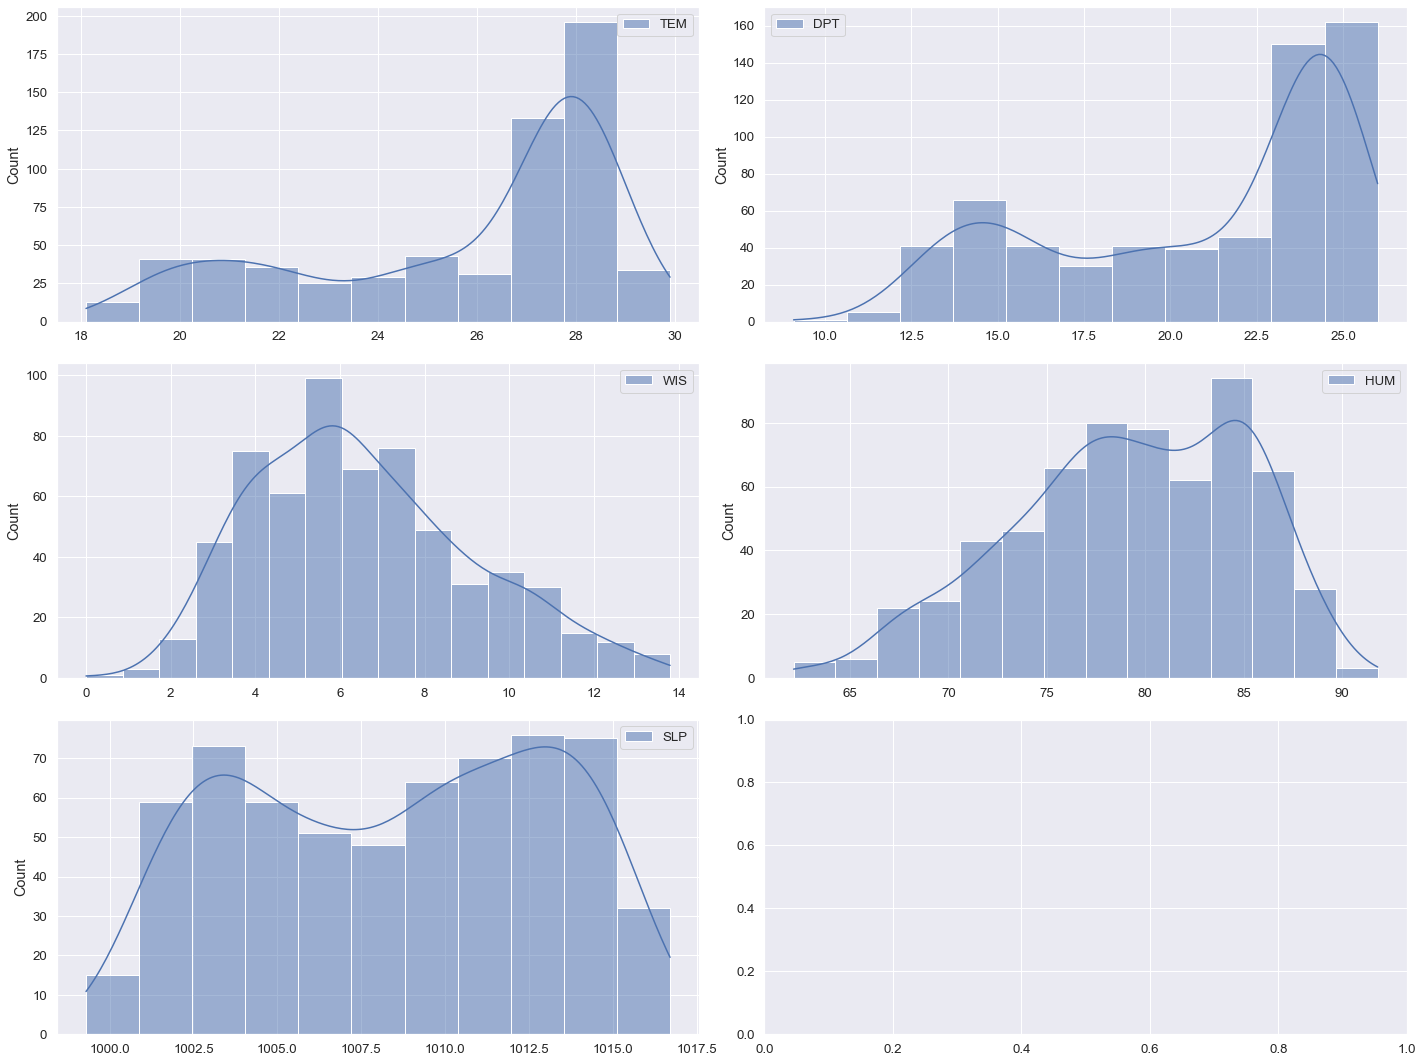

In [16]:
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(20, 15))
index = 0
axs = axs.flatten() # type: ignore
for j in cols.items():
    sns.histplot(j, ax=axs[index],kde=True)
    index += 1
plt.tight_layout()

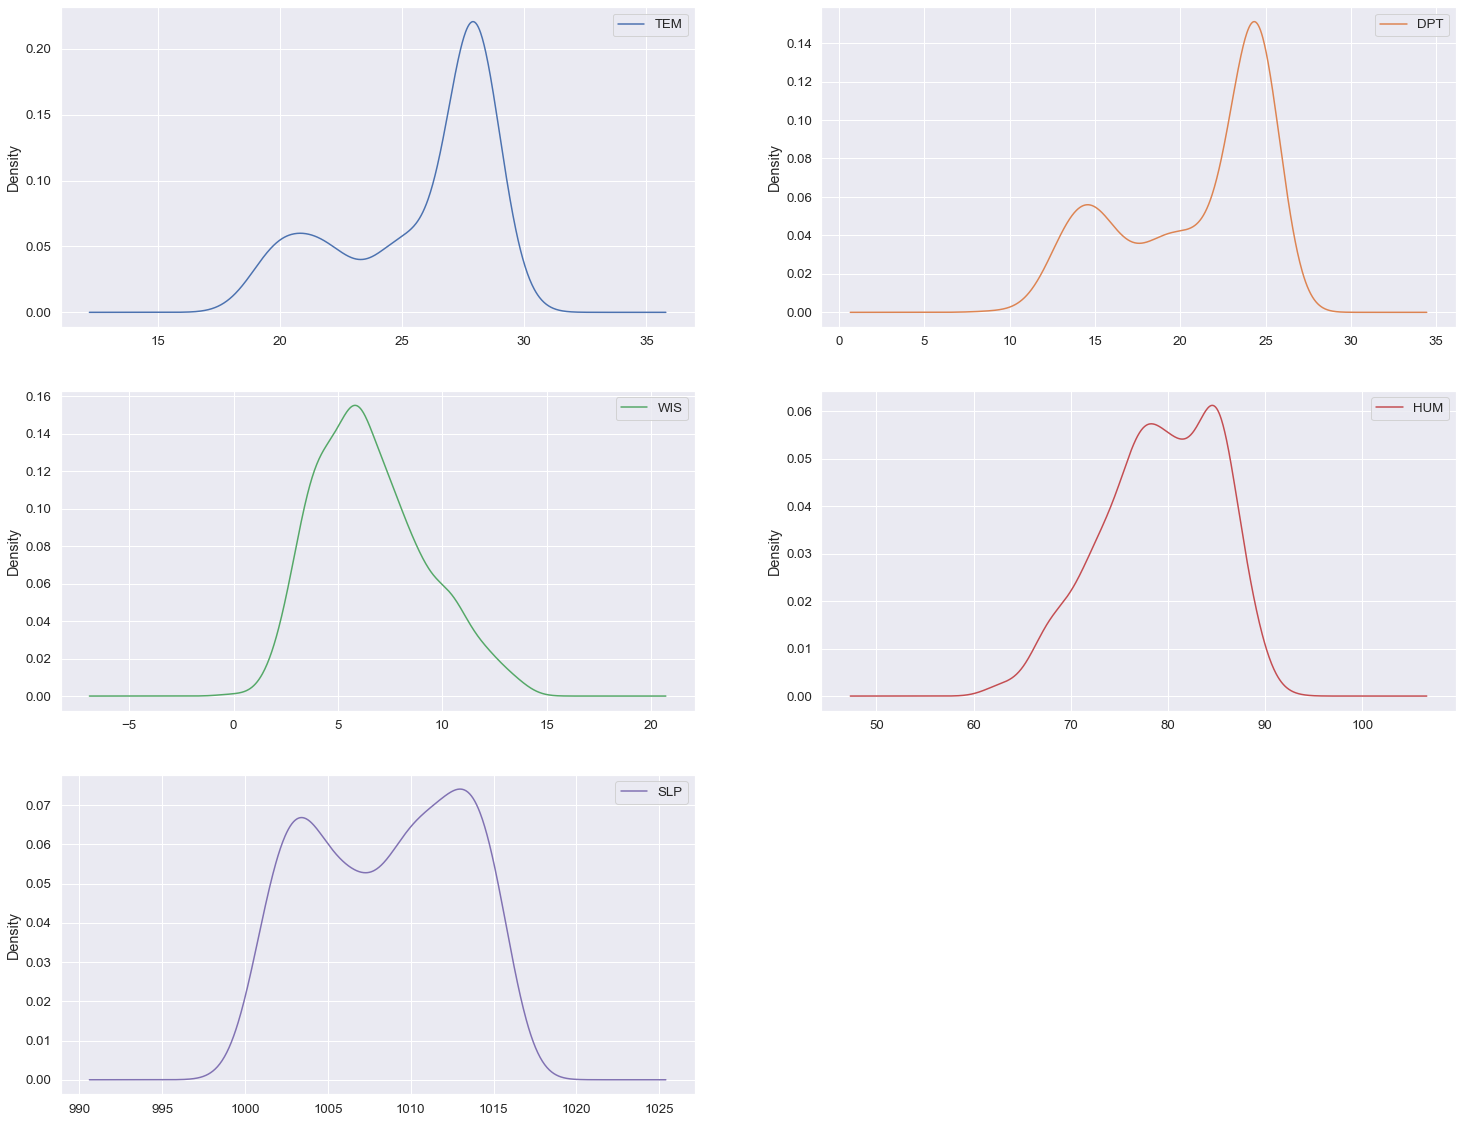

In [17]:
# Density Plot Univariate 'Density'
df_selected.plot(kind = 'density', subplots = True, layout = (3,2), sharex = False,figsize=(25,20))
plt.show()

In [18]:
df_selected.RAN.value_counts()

LTR    223
NRT    204
MHR    195
Name: RAN, dtype: int64

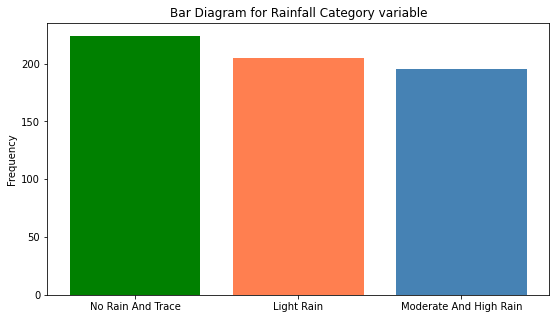

In [7]:
objects = ('No Rain And Trace','Light Rain','Moderate And High Rain') # Bar diagram is for nominal or ordinal data
x_pos = np.arange(len(objects))
frequency=[224, 205, 195] # get the frequency value from df.RAN.value_counts()
plt.figure(figsize = (9,5))
plt.bar(x_pos, frequency , color = ('green', 'coral', 'steelblue'))
plt.xticks(x_pos, objects)
plt.ylabel('Frequency')
plt.title('Bar Diagram for Rainfall Category variable')
plt.show()

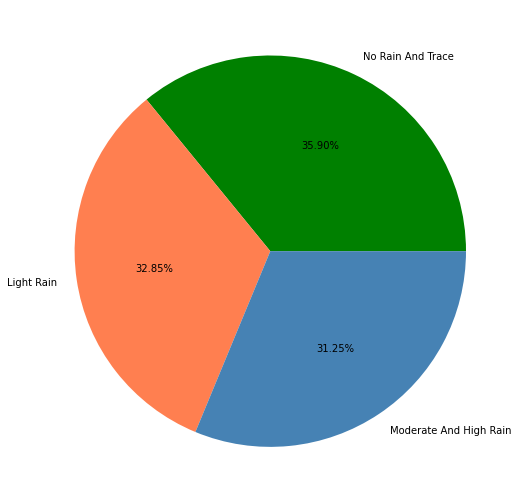

In [13]:
# Pie diagram is also used for nominal or categorical data
plt.figure(figsize=(9,9))
plt.pie(frequency, labels=['No Rain And Trace','Light Rain','Moderate And High Rain'], colors=['green', 'coral', 'steelblue'],  autopct='%.2f%%')
plt.show()

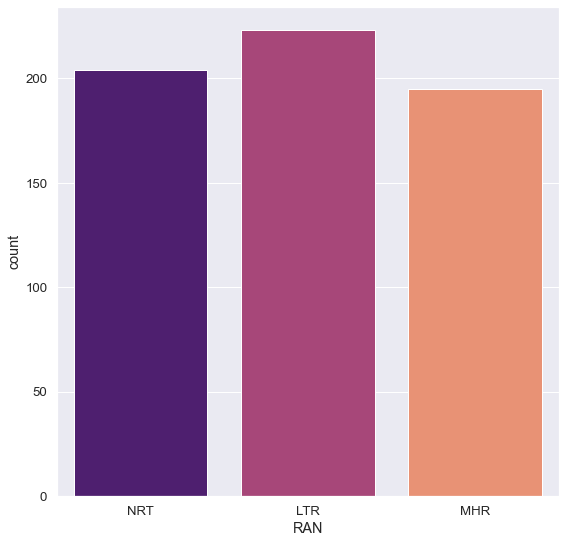

In [21]:
plt.figure(figsize=(9,9))
sns.countplot(x = df_selected.RAN,palette='magma')
plt.show()

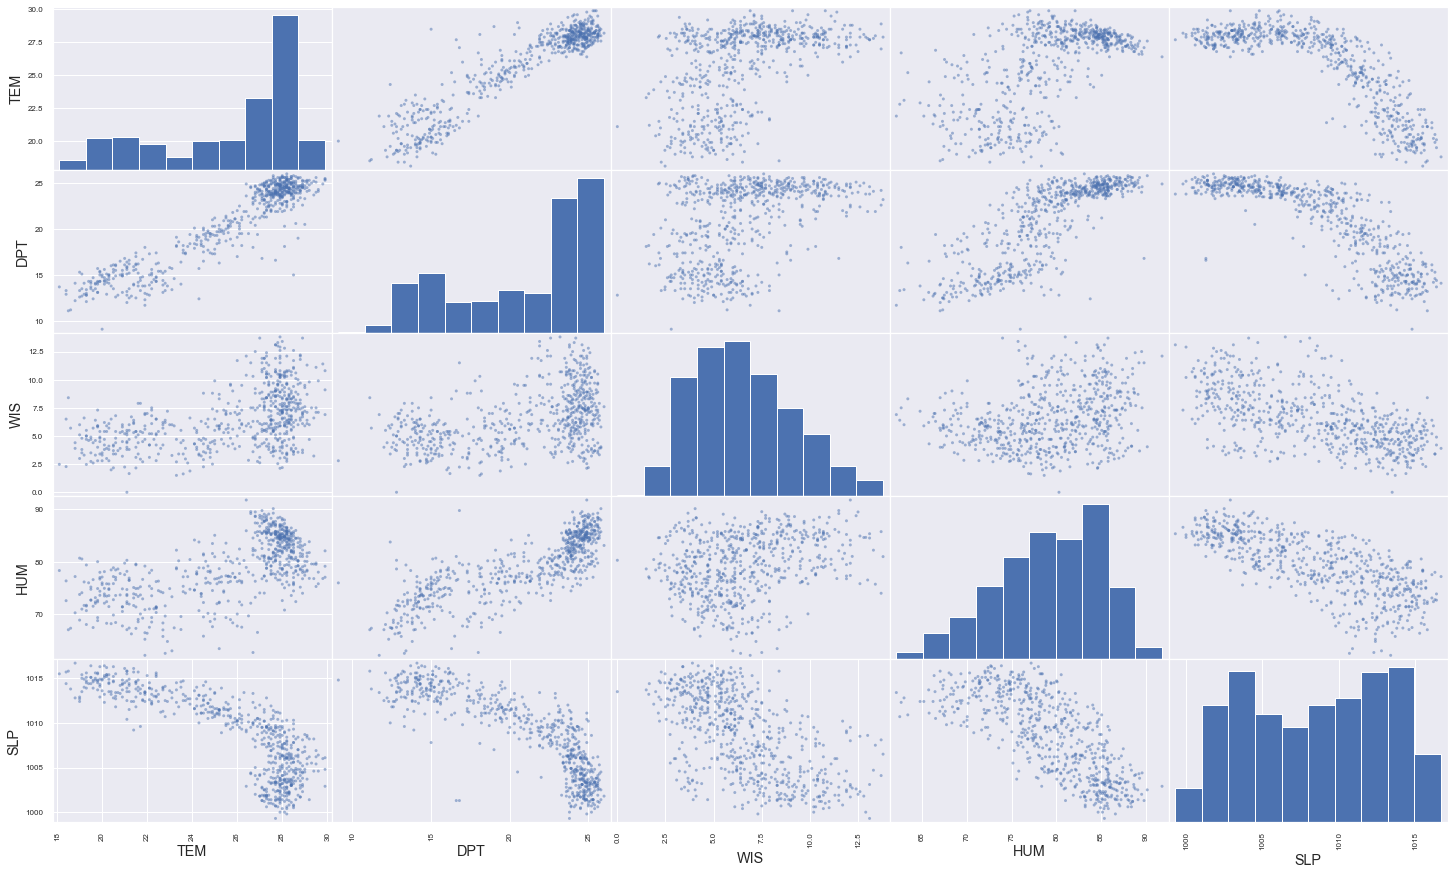

In [22]:
# Scatter Plot 
from pandas.plotting import scatter_matrix
scatter_matrix(df_selected,figsize=(25,15))
plt.show()

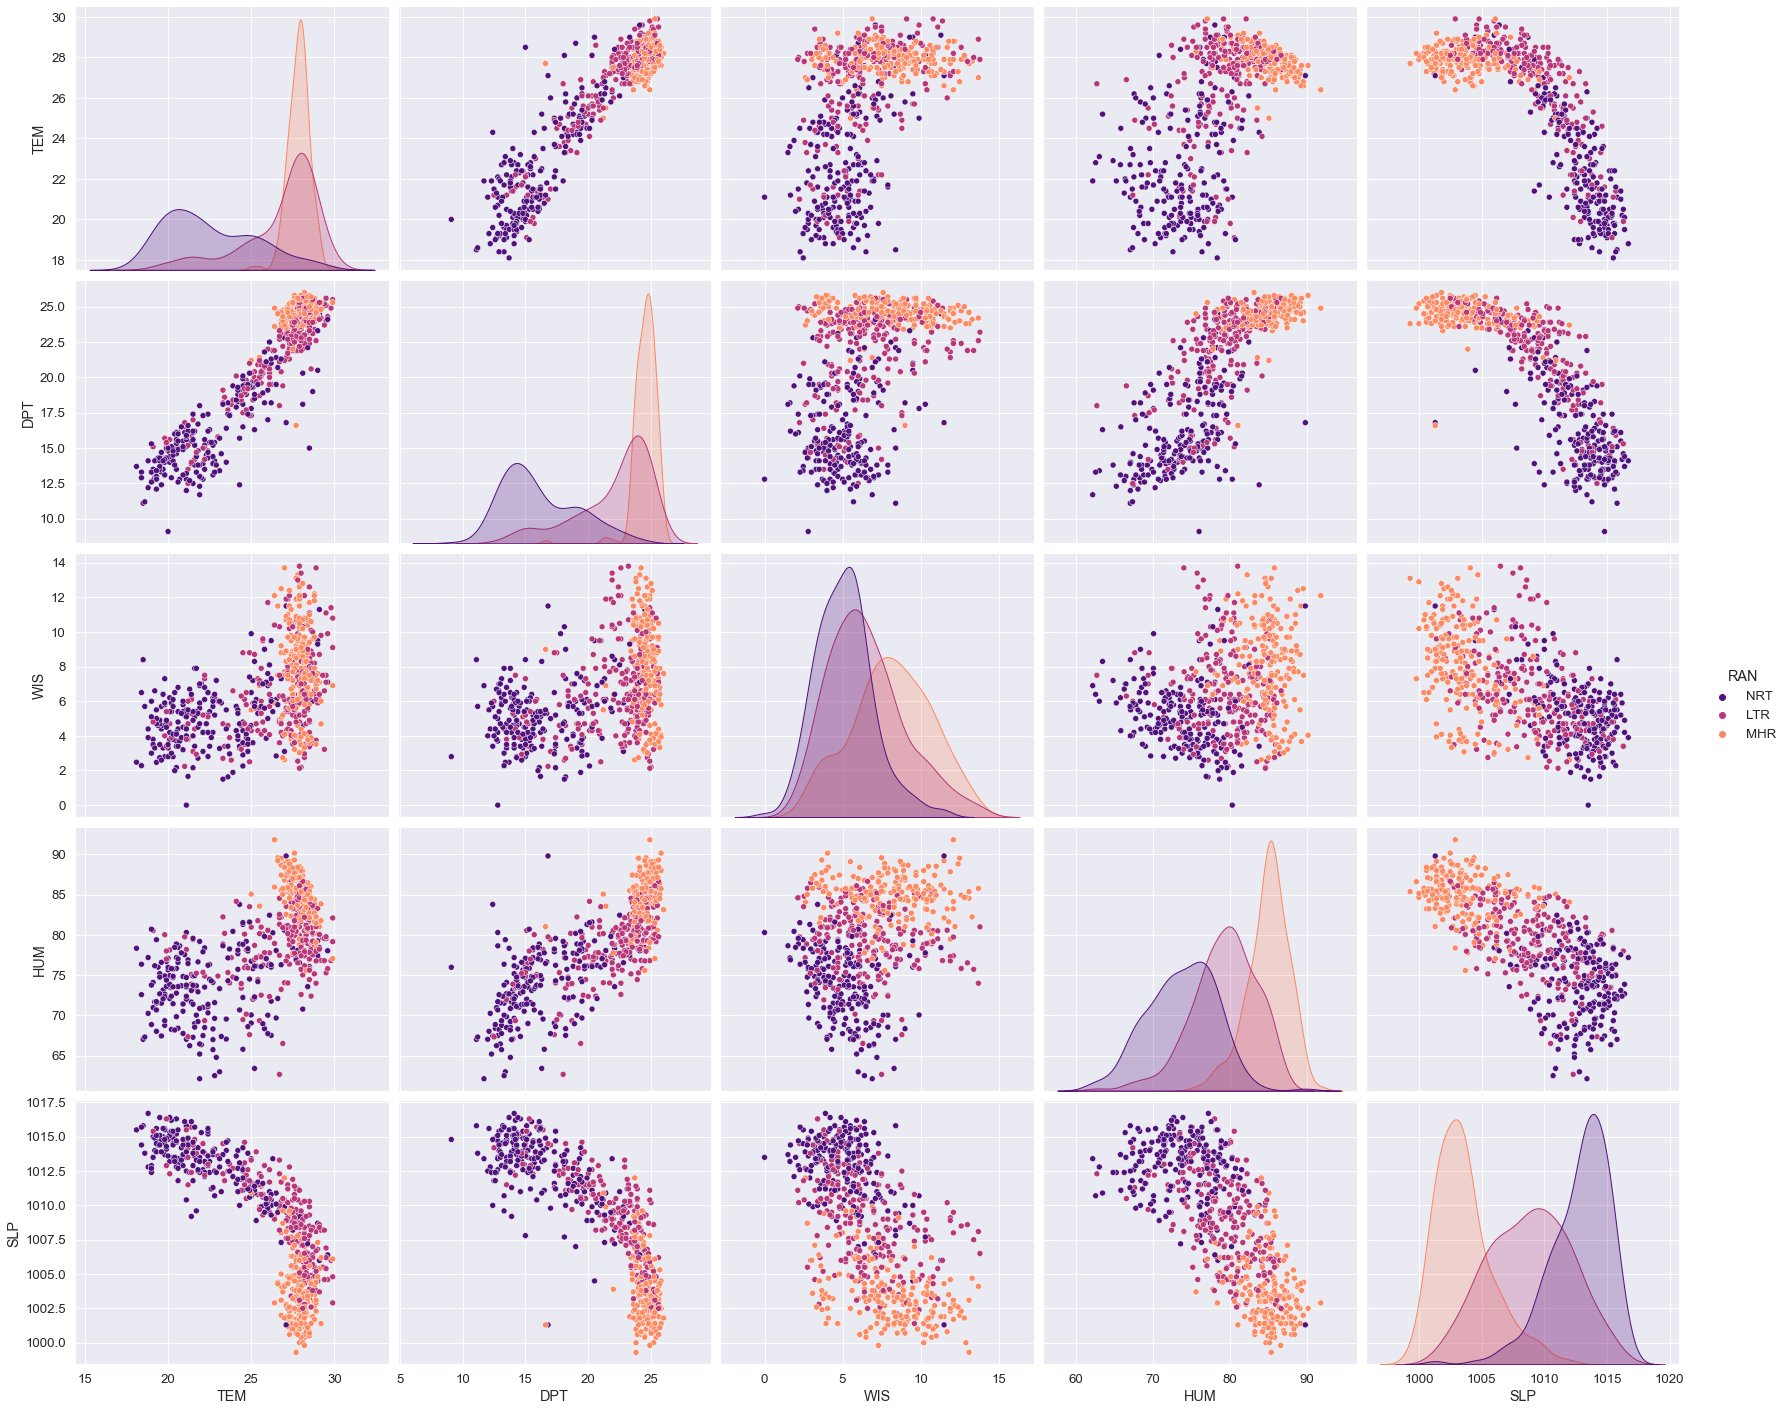

In [23]:
# pairplot with respect to RAN 
sns.pairplot(df_selected,hue="RAN",palette='magma',size=4, aspect=1.2) 
plt.show()

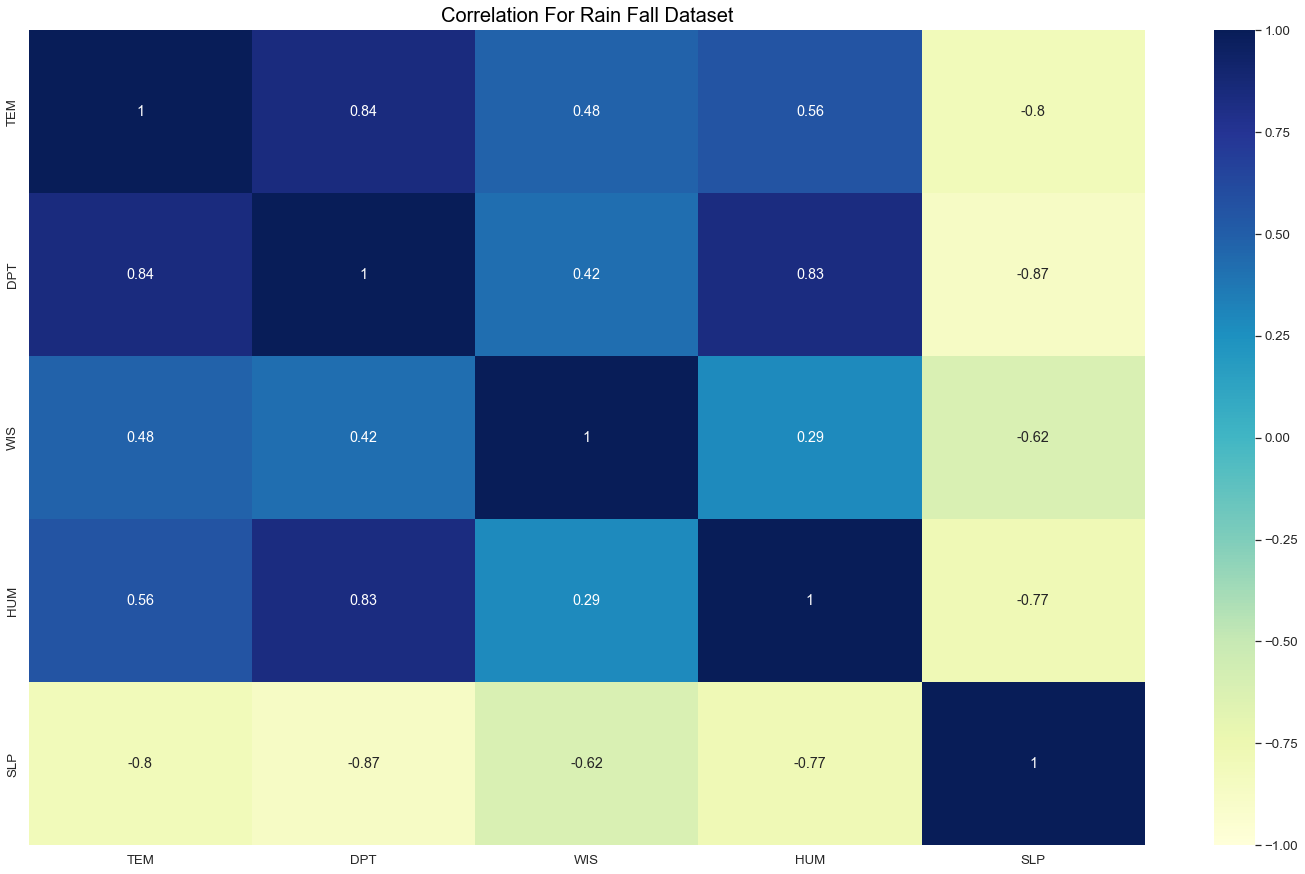

In [24]:
plt.figure(figsize=(25, 15))
heatmap_ = sns.heatmap(cols.corr(method='spearman'), annot=True, cmap="YlGnBu", vmin=-1, vmax=1)
heatmap_.set_title('Correlation For Rain Fall Dataset', fontdict={'fontsize':20}, pad=8 ,color='black')
plt.show()

In [25]:
df_selected1 = df_selected.copy()

In [26]:
le=LabelEncoder()
df_selected1.RAN= le.fit_transform(df_selected1['RAN']) # NRT=2, LTR=0, MHR=1

In [27]:
df_selected1

TEM   DPT   WIS    HUM     SLP  RAN
0    19.6  13.3   4.4  71.52  1014.6    2
1    22.3  14.5   4.7  71.03  1013.0    2
2    26.5  21.4   6.1  78.06  1010.9    2
3    27.4  22.5  10.5  80.70  1007.7    0
4    28.3  24.0   6.2  79.97  1004.6    0
..    ...   ...   ...    ...     ...  ...
619  28.6  25.7   6.4  84.52  1004.3    1
620  29.2  24.8   6.0  81.77  1006.2    1
621  27.6  23.9   3.6  80.97  1010.5    0
622  24.8  19.2   4.4  75.90  1012.6    0
623  21.2  16.6   5.5  76.45  1014.9    2

[622 rows x 6 columns]

In [29]:
df_selected1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 622 entries, 0 to 623
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TEM     622 non-null    float64
 1   DPT     622 non-null    float64
 2   WIS     622 non-null    float64
 3   HUM     622 non-null    float64
 4   SLP     622 non-null    float64
 5   RAN     622 non-null    int32  
dtypes: float64(5), int32(1)
memory usage: 31.6 KB


In [31]:
df_selected1.isnull().sum()

TEM    0
DPT    0
WIS    0
HUM    0
SLP    0
RAN    0
dtype: int64

In [32]:
X = df_selected1.drop("RAN", axis=1)
y = df_selected1.RAN

In [33]:
y_categorical = to_categorical(y)

In [34]:
X = X.to_numpy()
y = y.to_numpy()

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [36]:
X_train_ann,X_test_ann,y_train_ann,y_test_ann = train_test_split(X, y_categorical, test_size=0.3, random_state=42)

In [37]:
X_train.shape , X_test.shape

((435, 5), (187, 5))

In [38]:
y_train.shape, y_test.shape # type: ignore

((435,), (187,))

In [39]:
y_train_ann.shape, y_test_ann.shape

((435, 3), (187, 3))

#### Standardization (Normal Distribution)

In [40]:
#Standardizing the data (0 for the mean, 1 for the standard deviation)
Standard_scaler = StandardScaler()
X_train_scaled = Standard_scaler.fit_transform(X_train)
X_test_scaled = Standard_scaler.fit_transform(X_test)
X_train_scaled,X_test_scaled

(array([[ 0.62580939, -0.99924415,  0.92631241,  0.30876276, -1.55308839],
        [-0.31245843, -0.39614626, -0.85859132, -0.54829067,  0.90908215],
        [-0.21539624, -0.37295019, -1.16900936, -0.39793042,  0.69119095],
        ...,
        [ 0.65816345,  0.64767701,  0.30547633,  0.7548315 , -0.22395208],
        [ 0.85228783,  0.81004952, -0.04374397,  0.90519175, -1.18267335],
        [ 0.94935002, -0.44253841, -0.23775524,  0.17009719, -0.31110856]]),
 array([[-1.62044622, -1.37741397,  0.13847047, -0.98413262,  0.95066675],
        [ 0.91276563,  0.77022333,  1.13116202,  0.59559267, -1.12537441],
        [ 0.56003993,  0.70019168,  0.82571847,  1.17932888, -0.66646005],
        [ 0.52797396,  1.00366216,  2.27657535,  1.65393932, -1.32205199],
        [ 0.65623785,  0.77022333,  0.44391402,  0.55748526, -0.68831311],
        [ 0.65623785,  0.88694274,  2.54383846,  0.91604133, -1.21278667],
        [-0.14541147, -0.09350037,  0.86389891, -0.40212856,  0.62287078],
        [-

#### Logistic regression

In [41]:
# logistic
params =    {
            'penalty' : ['l1', 'l2'], # l1 lasso , l2 ridge
            'C' : np.logspace(-3,3,7),
            'solver': ['newton-cg','lbfgs','liblinear','saga'],
            }

In [42]:
## logistic
logmodel = LogisticRegression()
logmodel_cv = GridSearchCV(logmodel,param_grid=params,scoring = 'accuracy', cv=10)

In [43]:
logmodel_cv.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga']},
             scoring='accuracy')

In [44]:
print(f'Best Parameters >>> {logmodel_cv.best_params_}')

Best Parameters >>> {'C': 10.0, 'penalty': 'l1', 'solver': 'saga'}


In [45]:
logmodel = LogisticRegression(C = 10.0, penalty = 'l1', solver = 'saga')

In [46]:
logmodel.fit(X_train_scaled, y_train)

LogisticRegression(C=10.0, penalty='l1', solver='saga')

In [47]:
print('#### Output of Logistic Regression using sklearn ###')
print('Coefficients:', logmodel.coef_)
print('Intercept:', logmodel.intercept_)

#### Output of Logistic Regression using sklearn ###
Coefficients: [[ 0.04735886  0.13705202  0.         -0.14503635  0.3198343 ]
 [-1.59013855  0.77945277  0.36872734  1.90375814 -1.80510746]
 [ 0.50772686 -1.97556294 -0.4340331  -0.70107571  0.44135832]]
Intercept: [ 0.99210673 -0.7190383  -0.27306842]


In [48]:
y_train_pred_logit=logmodel.predict(X_train_scaled)
y_test_pred_logit=logmodel.predict(X_test_scaled)

In [49]:
train_accuracy = accuracy_score(y_train, y_train_pred_logit)
test_accuracy = accuracy_score(y_test, y_test_pred_logit)
print(train_accuracy)
print(test_accuracy)

0.7770114942528735
0.7647058823529411


In [50]:
print(classification_report(y_test, y_test_pred_logit))

              precision    recall  f1-score   support

           0       0.73      0.63      0.68        71
           1       0.77      0.89      0.82        53
           2       0.80      0.81      0.80        63

    accuracy                           0.76       187
   macro avg       0.76      0.78      0.77       187
weighted avg       0.76      0.76      0.76       187



#### ROC Curve Plot

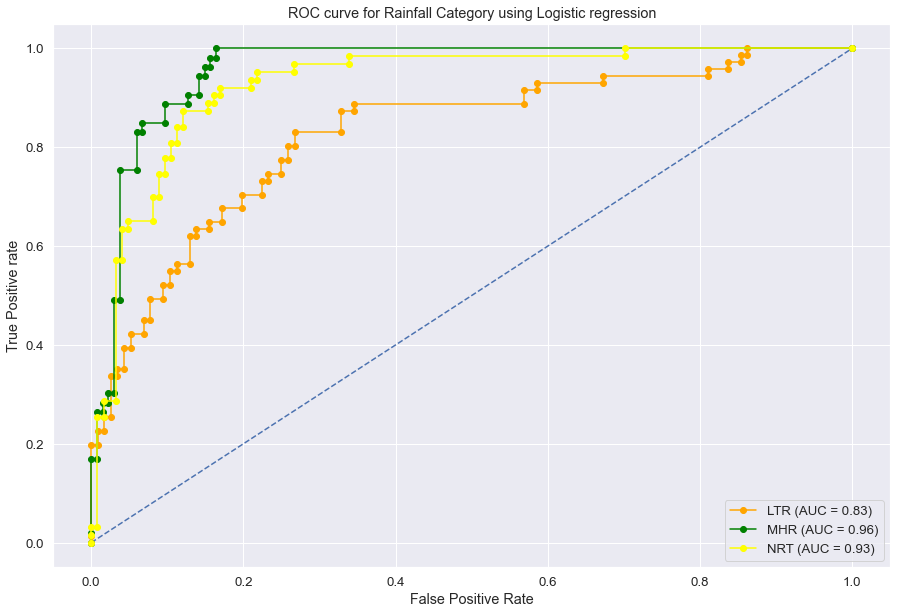

In [51]:
yhat = logmodel.predict_proba(X_test_scaled) 

# calculate roc curve for multi-class model
n_class = 3

fpr = {}
tpr = {}
thresh ={}
auc_list = []


for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, yhat[:,i], pos_label=i)
    auc_value = round(auc(fpr[i], tpr[i]),2)  
    auc_list.append(auc_value)

plt.figure(figsize = (15,10))

# plot no skill/RANDOM roc curve
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(fpr[0], tpr[0], marker='o',color='orange', label=f"LTR (AUC = {auc_list[0]:.2f})")
plt.plot(fpr[1], tpr[1], marker='o',color='green', label=f"MHR (AUC = {auc_list[1]:.2f})")
plt.plot(fpr[2], tpr[2], marker='o',color='yellow', label=f"NRT (AUC = {auc_list[2]:.2f})")


plt.title('ROC curve for Rainfall Category using Logistic regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

# show the plot
plt.legend(loc='best')
plt.show()

#### Decision Tree

In [52]:
params_Dt =    {
            'criterion' : ['gini', 'entropy'], 
            'max_depth' : [x for x in range(1,9)],
            'min_samples_leaf':  [3,5,7,9],
            'min_samples_split':  [3,5,7,9],
            }

In [53]:
# decision tree
DTclf=tree.DecisionTreeClassifier()
DTclf_cv = GridSearchCV(DTclf,param_grid=params_Dt,scoring = 'accuracy', cv=10, verbose=2)

In [54]:
DTclf_cv.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 256 candidates, totalling 2560 fits
[CV] END criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_lea

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [3, 5, 7, 9],
                         'min_samples_split': [3, 5, 7, 9]},
             scoring='accuracy', verbose=2)

In [55]:
print(f'Best Parameters >>> {DTclf_cv.best_params_}')

Best Parameters >>> {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 5}


In [56]:
DTclf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, min_samples_leaf = 3, min_samples_split = 5, random_state=43)

In [57]:
DTclf.fit(X_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3,
                       min_samples_split=5, random_state=43)

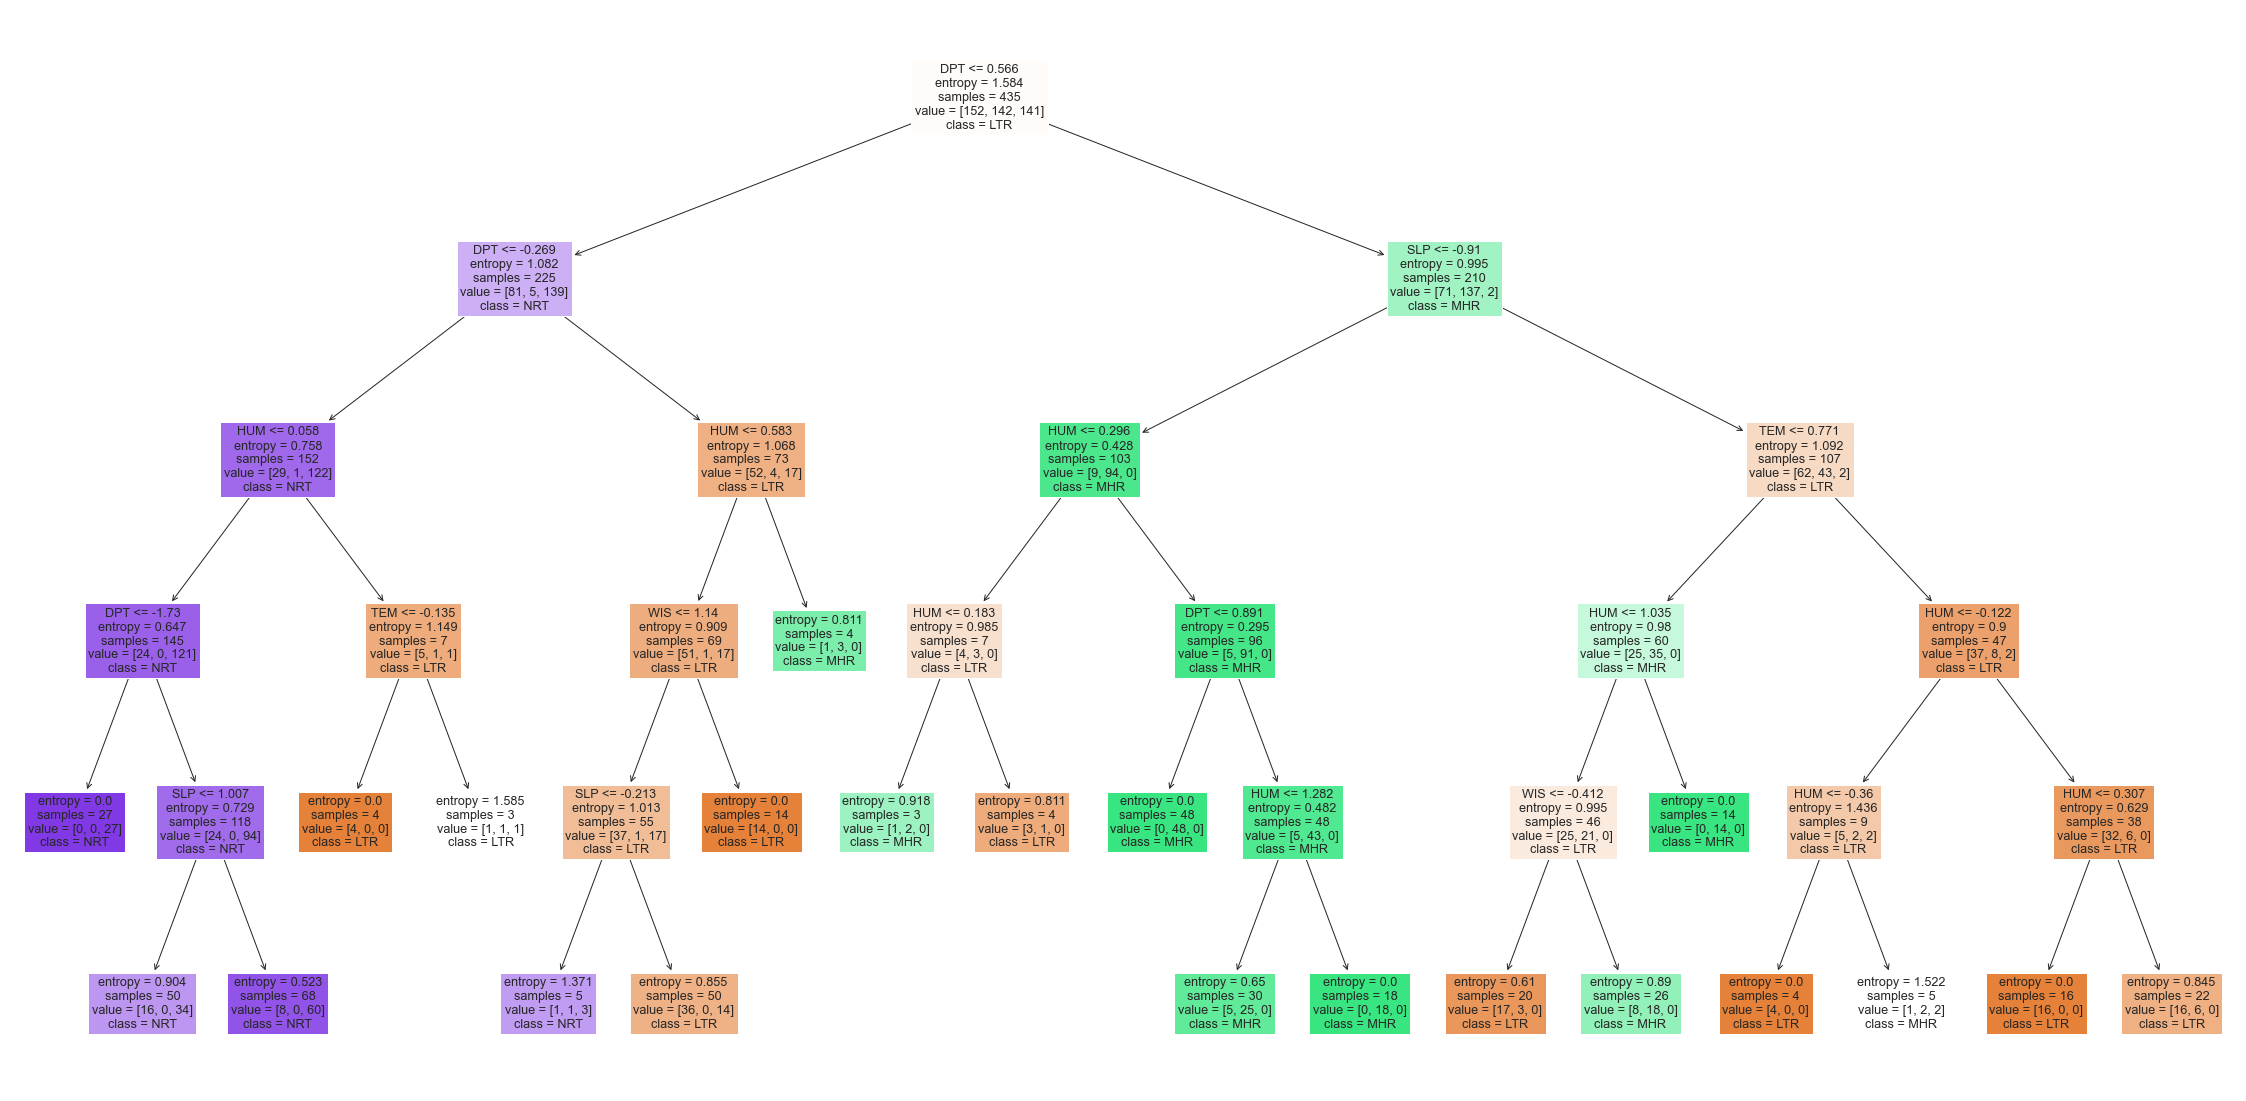

In [58]:
plt.figure(figsize=(40,20))
tree.plot_tree(DTclf,filled=True,class_names=['LTR','MHR',"NRT"],feature_names=df_selected1.columns)
plt.show()

In [59]:
y_train_pred_dt=DTclf.predict(X_train_scaled)
y_test_pred_dt=DTclf.predict(X_test_scaled)

In [60]:
train_accuracy = accuracy_score(y_train, y_train_pred_dt)
test_accuracy = accuracy_score(y_test, y_test_pred_dt)
print(train_accuracy)
print(test_accuracy)

0.8390804597701149
0.7165775401069518


In [61]:
print(classification_report(y_test, y_test_pred_dt))

              precision    recall  f1-score   support

           0       0.67      0.51      0.58        71
           1       0.71      0.91      0.79        53
           2       0.77      0.79      0.78        63

    accuracy                           0.72       187
   macro avg       0.71      0.74      0.72       187
weighted avg       0.71      0.72      0.71       187



#### ROC Curve Plot

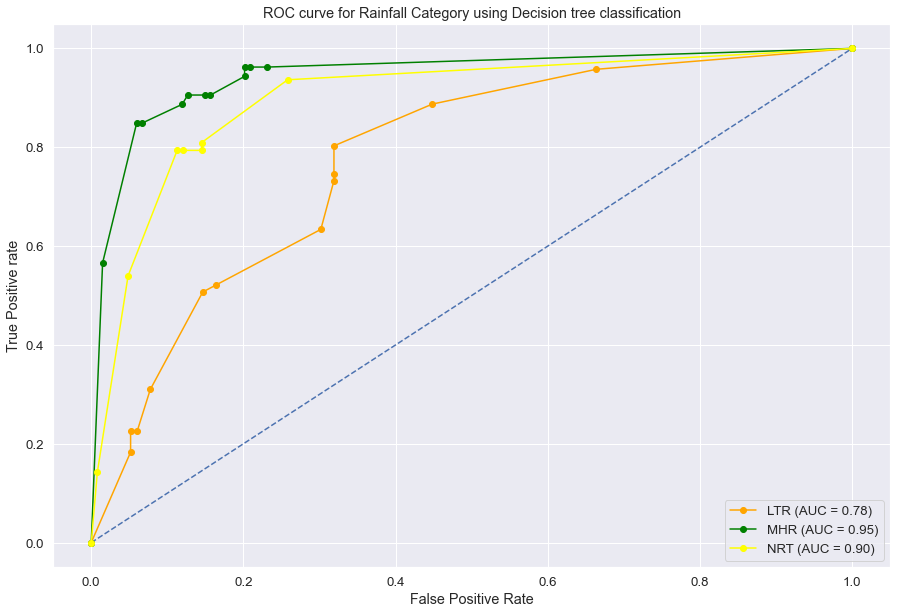

In [62]:
yhat = DTclf.predict_proba(X_test_scaled) 
# calculate roc curve for multi-class model
n_class = 3

fpr = {}
tpr = {}
thresh ={}
auc_list = []


for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, yhat[:,i], pos_label=i)
    auc_value = round(auc(fpr[i], tpr[i]),2)  
    auc_list.append(auc_value)


plt.figure(figsize = (15,10))

# plot no skill/RANDOM roc curve
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(fpr[0], tpr[0], marker='o',color='orange', label=f"LTR (AUC = {auc_list[0]:.2f})")
plt.plot(fpr[1], tpr[1], marker='o',color='green', label=f"MHR (AUC = {auc_list[1]:.2f})")
plt.plot(fpr[2], tpr[2], marker='o',color='yellow', label=f"NRT (AUC = {auc_list[2]:.2f})")


plt.title('ROC curve for Rainfall Category using Decision tree classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

# show the plot
plt.legend(loc='best')
plt.show()

#### Random Forest

In [63]:
params_Rf =  {
            'criterion' : ['gini', 'entropy'], 
            'max_depth' : [x for x in range(1,9)],
            'min_samples_leaf':  [1,3,5,7],
            'min_samples_split':  [1,3,5,7],
            'n_estimators': [19,29],  # n_estimators means random trees
            }

In [64]:
# Random forest
#rf = OneVsRestClassifier(RandomForestClassifier(n_jobs=-1, n_estimators=50, max_features=4, random_state=42))
RFclf= RandomForestClassifier() 
RFclf_cv = GridSearchCV(RFclf,param_grid=params_Rf,scoring = 'accuracy', cv=10, verbose=2)

In [65]:
RFclf_cv.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 512 candidates, totalling 5120 fits
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1, n_estimators=19; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1, n_estimators=19; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1, n_estimators=19; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1, n_estimators=19; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1, n_estimators=19; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1, n_estimators=19; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1, n_estimators=19; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1, n_estimators=19; total time=   0.0s
[CV] END criter

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [1, 3, 5, 7],
                         'min_samples_split': [1, 3, 5, 7],
                         'n_estimators': [19, 29]},
             scoring='accuracy', verbose=2)

In [66]:
print(f'Best Parameters >>> {RFclf_cv.best_params_}')

Best Parameters >>> {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 29}


In [67]:
RFclf=RandomForestClassifier(criterion = 'entropy', n_estimators=29, min_samples_split= 5, min_samples_leaf= 1, max_depth = 8, random_state=43) 

In [68]:
RFclf.fit(X_train_scaled, y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_split=5,
                       n_estimators=29, random_state=43)

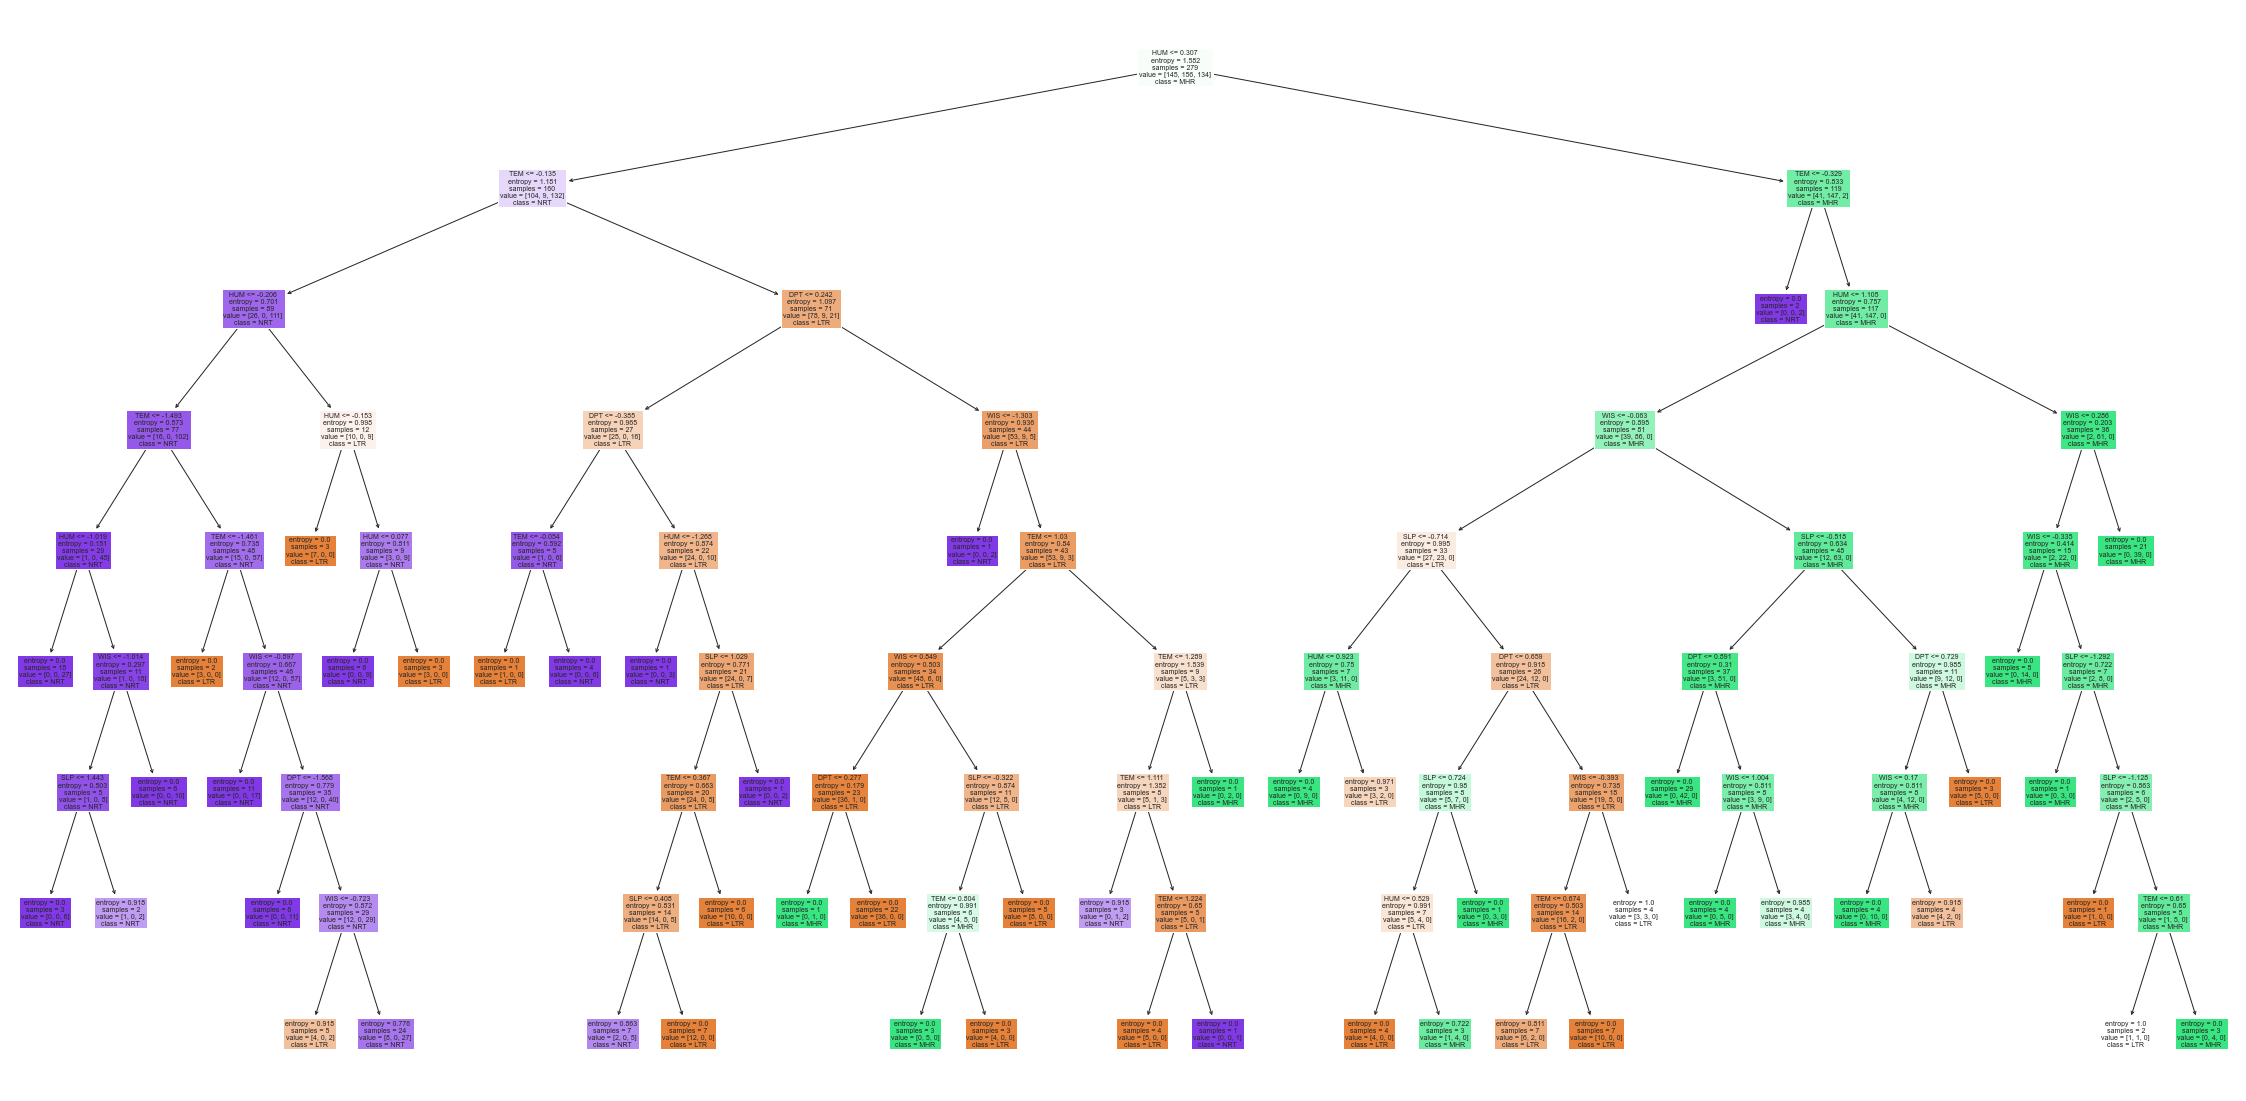

In [69]:
plt.figure(figsize=(40,20))
tree.plot_tree(RFclf.estimators_[0],filled=True,class_names=['LTR','MHR',"NRT"],feature_names=df_selected1.columns)
plt.show()

In [70]:
for i in range(len(RFclf.estimators_)):
    print(tree.export_text(RFclf.estimators_[i]))

|--- feature_3 <= 0.31
|   |--- feature_0 <= -0.13
|   |   |--- feature_3 <= -0.21
|   |   |   |--- feature_0 <= -1.49
|   |   |   |   |--- feature_3 <= -1.02
|   |   |   |   |   |--- class: 2.0
|   |   |   |   |--- feature_3 >  -1.02
|   |   |   |   |   |--- feature_2 <= -1.01
|   |   |   |   |   |   |--- feature_4 <= 1.44
|   |   |   |   |   |   |   |--- class: 2.0
|   |   |   |   |   |   |--- feature_4 >  1.44
|   |   |   |   |   |   |   |--- class: 2.0
|   |   |   |   |   |--- feature_2 >  -1.01
|   |   |   |   |   |   |--- class: 2.0
|   |   |   |--- feature_0 >  -1.49
|   |   |   |   |--- feature_0 <= -1.46
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- feature_0 >  -1.46
|   |   |   |   |   |--- feature_2 <= -0.90
|   |   |   |   |   |   |--- class: 2.0
|   |   |   |   |   |--- feature_2 >  -0.90
|   |   |   |   |   |   |--- feature_1 <= -1.57
|   |   |   |   |   |   |   |--- class: 2.0
|   |   |   |   |   |   |--- feature_1 >  -1.57
|   |   |   |   |   |   |   |--- fe

In [71]:
y_train_pred_rf=RFclf.predict(X_train_scaled)
y_test_pred_rf=RFclf.predict(X_test_scaled)

In [72]:
train_accuracy = accuracy_score(y_train, y_train_pred_rf)
test_accuracy = accuracy_score(y_test, y_test_pred_rf)
print(train_accuracy)
print(test_accuracy)

0.9494252873563218
0.7700534759358288


In [73]:
print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

           0       0.73      0.65      0.69        71
           1       0.78      0.89      0.83        53
           2       0.80      0.81      0.80        63

    accuracy                           0.77       187
   macro avg       0.77      0.78      0.77       187
weighted avg       0.77      0.77      0.77       187



#### ROC Curve Plot

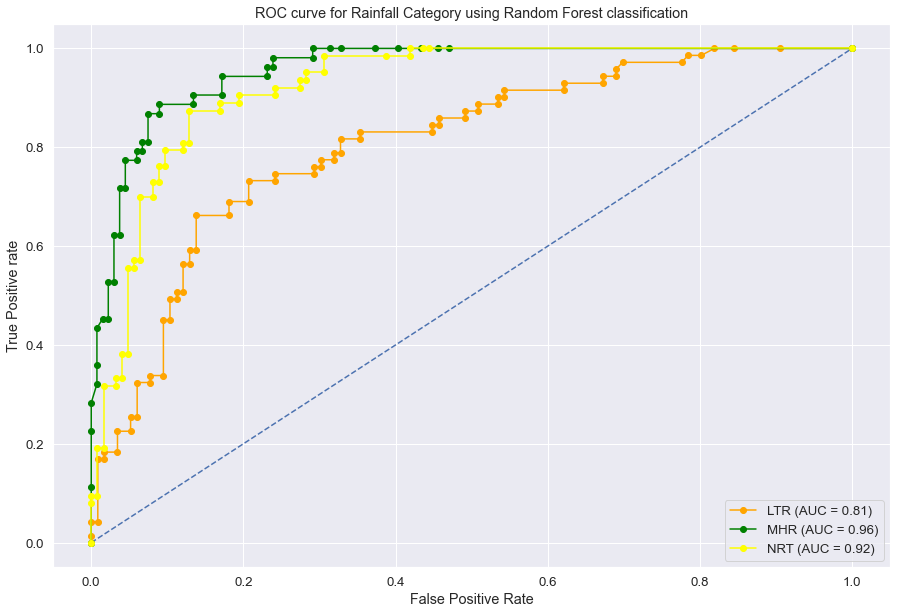

In [75]:
yhat = RFclf.predict_proba(X_test_scaled) 
# calculate roc curve for multi-class model
n_class = 3

fpr = {}
tpr = {}
thresh ={}
auc_list = []


for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, yhat[:,i], pos_label=i)
    auc_value = round(auc(fpr[i], tpr[i]),2)  
    auc_list.append(auc_value)


plt.figure(figsize = (15,10))

# plot no skill/RANDOM roc curve
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(fpr[0], tpr[0], marker='o',color='orange', label=f"LTR (AUC = {auc_list[0]:.2f})")
plt.plot(fpr[1], tpr[1], marker='o',color='green', label=f"MHR (AUC = {auc_list[1]:.2f})")
plt.plot(fpr[2], tpr[2], marker='o',color='yellow', label=f"NRT (AUC = {auc_list[2]:.2f})")


plt.title('ROC curve for Rainfall Category using Random Forest classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

# show the plot
plt.legend(loc='lower right')
plt.show()

#### ANN

In [76]:
#Early stopping
early_stopping = callbacks.EarlyStopping(
    min_delta=0.0001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

model = Sequential()
model.add(Dense(512, input_dim=5, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(len(y_categorical[0]), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train_ann, epochs=200, batch_size=16, validation_split=0.3, verbose=1, callbacks=[early_stopping])

scores = model.evaluate(X_test_scaled, y_test_ann)

for i, m in enumerate(model.metrics_names):
    print("\n%s: %.3f"% (m, scores[i]))

Epoch 1/200
19/19 [==============================] - 4s 26ms/step - loss: 1.0294 - accuracy: 0.3553 - val_loss: 0.8888 - val_accuracy: 0.4733
Epoch 2/200
19/19 [==============================] - 0s 8ms/step - loss: 0.9249 - accuracy: 0.4671 - val_loss: 0.8913 - val_accuracy: 0.5267
Epoch 3/200
19/19 [==============================] - 0s 7ms/step - loss: 0.8460 - accuracy: 0.5625 - val_loss: 0.8416 - val_accuracy: 0.4962
Epoch 4/200
19/19 [==============================] - 0s 6ms/step - loss: 0.8220 - accuracy: 0.5987 - val_loss: 0.8791 - val_accuracy: 0.5420
Epoch 5/200
19/19 [==============================] - 0s 7ms/step - loss: 0.8021 - accuracy: 0.5592 - val_loss: 0.7997 - val_accuracy: 0.5191
Epoch 6/200
19/19 [==============================] - 0s 6ms/step - loss: 0.7524 - accuracy: 0.6151 - val_loss: 0.8387 - val_accuracy: 0.5420
Epoch 7/200
19/19 [==============================] - 0s 6ms/step - loss: 0.7778 - accuracy: 0.6151 - val_loss: 0.8026 - val_accuracy: 0.5344
Epoch 8/200


In [77]:
training_loss, training_accuracy = model.evaluate(X_train_scaled, y_train_ann)
testing_loss, testing_accuracy = model.evaluate(X_test_scaled, y_test_ann)

6/6 [==============================] - 0s 4ms/step - loss: 0.6583 - accuracy: 0.7807


In [78]:
print(f"Train Loss: {training_loss}")
print(f"Train Accuracy: {training_accuracy}")

print(f"Test Loss: {testing_loss}")
print(f"Test Accuracy: {testing_accuracy}")

Train Loss: 0.48509594798088074
Train Accuracy: 0.8022988438606262
Test Loss: 0.6582548022270203
Test Accuracy: 0.7807486653327942


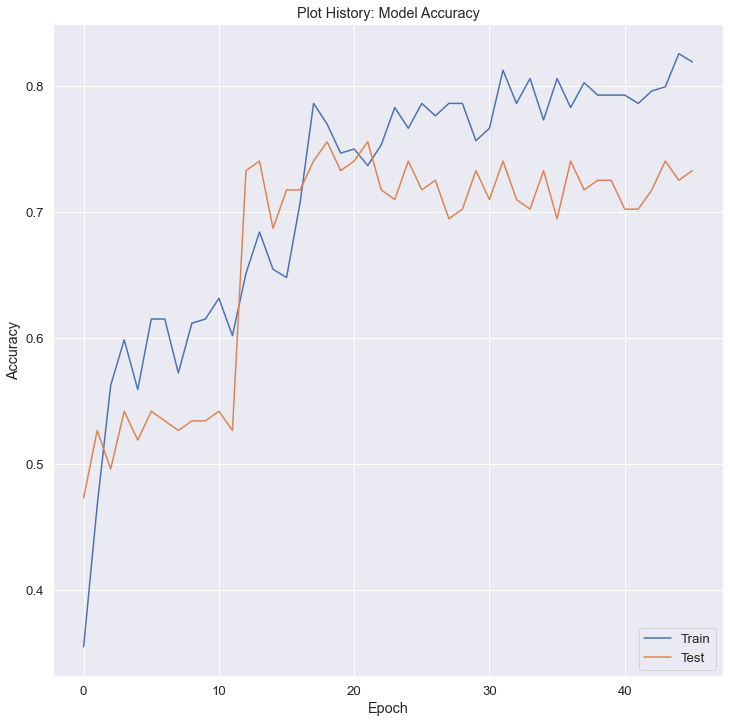

In [79]:
# plot the accuracy and loss
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Plot History: Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

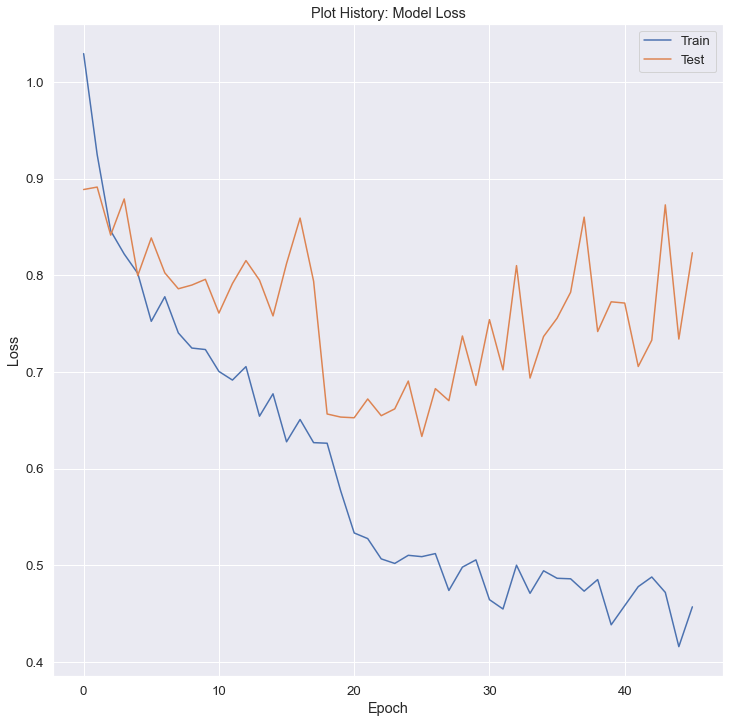

In [80]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='test loss')
plt.title('Plot History: Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [81]:
y_pred_ann = model.predict(X_test_scaled)
y_pred_ann = ((y_pred_ann > 0.49).astype("int32"))

6/6 [==============================] - 0s 3ms/step


In [82]:
from sklearn.metrics import classification_report
print(classification_report(y_test_ann,y_pred_ann))

              precision    recall  f1-score   support

           0       0.78      0.59      0.67        71
           1       0.80      0.91      0.85        53
           2       0.77      0.86      0.81        63

   micro avg       0.78      0.77      0.78       187
   macro avg       0.78      0.78      0.78       187
weighted avg       0.78      0.77      0.77       187
 samples avg       0.77      0.77      0.77       187



#### ROC Curve Plot

6/6 [==============================] - 0s 2ms/step


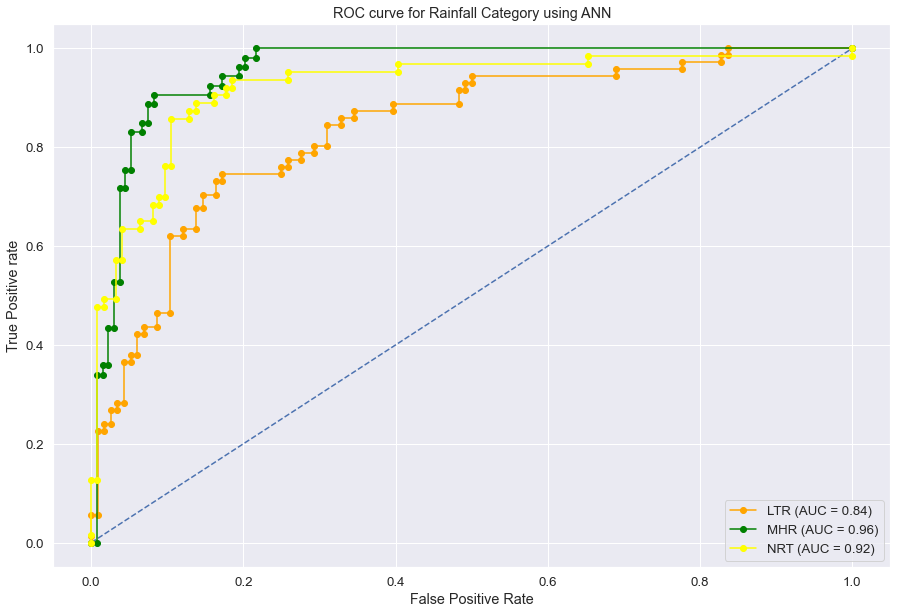

In [83]:
yhat = model.predict(X_test_scaled)
# calculate roc curve for multi-class model
n_class = 3

fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_class):
    fpr[i], tpr[i], _ = roc_curve(y_test_ann[:, i], yhat[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.figure(figsize = (15,10))

# plot no skill/RANDOM roc curve
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(fpr[0], tpr[0], marker='o',color='orange', label=f"LTR (AUC = {roc_auc[0]:.2f})")
plt.plot(fpr[1], tpr[1], marker='o',color='green', label=f"MHR (AUC = {roc_auc[1]:.2f})")
plt.plot(fpr[2], tpr[2], marker='o',color='yellow', label=f"NRT (AUC = {roc_auc[2]:.2f})")


plt.title('ROC curve for Rainfall Category using ANN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

# show the plot
plt.legend(loc='lower right')
plt.show()